In [1]:
import pandas as pd
import numpy as np
from ProgSnap2 import ProgSnap2Dataset
from ProgSnap2 import PS2
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import os
from os import path

In [2]:
#train_folder = "C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset/F19_Release_Train_06-28-21/Train"

In [3]:
#Snippet from "naive_model.ipynb". 
#Defining the path and semester
semester = 'S19'
BASE_PATH = os.path.join('C:/Users/Jesper/Google Drive/Uni docs/Statistik/Masterarbeit/Daten/csedm_challenge_dataset', 'F19_Release_Train_06-28-21')
TRAIN_PATH = os.path.join(BASE_PATH, 'Train')

In [4]:
#Setting up a ProgSnap2 Dataset (this is the data format used in the Challenge.)
train_ps2 = ProgSnap2Dataset(os.path.join(TRAIN_PATH, 'Data')) 

# Analyse Data

## Event Analysis

In [5]:
#Table of all Course Events
events = train_ps2.get_main_table()
events

,SubjectID,ToolInstances,ServerTimestamp,ServerTimezone,CourseID,AssignmentID,ProblemID,CodeStateID,IsEventOrderingConsistent,EventType,Score,Compile.Result,CompileMessageType,CompileMessageData,EventID,Order,ParentEventID
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Run.Program,1.000000,NaN,NaN,NaN,179362,179362,NaN
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:05:13,0,CS 1,439,1,79c9e2da9bc703116d8768297056db22866c43d583e529...,True,Compile,NaN,Success,NaN,NaN,179363,179363,179362.0
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Run.Program,1.000000,NaN,NaN,NaN,179364,179364,NaN
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:07:55,0,CS 1,439,3,0e91ae5696da0d6a724380360147b8699a25c14ff46227...,True,Compile,NaN,Success,NaN,NaN,179365,179365,179364.0
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,Java 8; CodeWorkout,2019-09-30T18:00:06,0,CS 1,439,5,1b38c7b1c7ebca281bbbc270d1b896484de663045c715f...,True,Run.Program,1.000000,NaN,NaN,NaN,179358,179358,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262377,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:25:42,0,CS 1,502,112,add860149e169c4e0ef359e8523a475bff1cb35185d799...,True,Compile,NaN,Success,NaN,NaN,458825,458825,458824.0
262378,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Run.Program,0.909091,NaN,NaN,NaN,458826,458826,NaN
262379,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:24,0,CS 1,502,118,e93270dbbeb99d37024546a81c424ca7ac89255c5ab3d4...,True,Compile,NaN,Success,NaN,NaN,458827,458827,458826.0
262380,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,Java 8; CodeWorkout,2019-12-02T15:28:51,0,CS 1,502,118,38e11aa1c182ae86953bcf1b435fd1a7e9decdb7434aee...,True,Run.Program,1.000000,NaN,NaN,NaN,458828,458828,NaN


In [6]:
#Are there different Courses?
events["CourseID"].value_counts()
#no

CS 1    262398
Name: CourseID, dtype: int64

In [7]:
#Which Events aere in the Data?
events["EventType"].value_counts(dropna=False)

Run.Program      91751
Compile          91751
Compile.Error    78896
Name: EventType, dtype: int64

In [8]:
#How many and which Assignments and Tasks do we have in the Data?
events["ProblemID"].groupby(events["AssignmentID"]).value_counts()

AssignmentID  ProblemID
439           13           13346
              232           9906
              236           6099
              3             4976
              233           4565
              5             3924
              234           3856
              235           3794
              1             2514
              12            1898
487           102          11974
              101          11597
              24            8143
              25            7186
              100           6034
              28            5481
              22            3850
              20            3322
              21            2534
              17            1978
492           40            9224
              32            9014
              38            8798
              34            7789
              128           6801
              33            5497
              39            4834
              36            4825
              37            4513
              31   

In [9]:
#Which scores can one get?
events["Score"].value_counts(dropna=False)
#Everything between 0 and 1. 
#Question: How is the Score derived?

NaN         170647
0.000000     39730
1.000000     18279
0.500000      1042
0.272727       978
             ...  
0.678571         1
0.535714         1
0.347826         1
0.173913         1
0.217391         1
Name: Score, Length: 212, dtype: int64

In [10]:
#How many students do we have in the Event-Data?
len(events["SubjectID"].unique())

367

## Overview of Task-Performance

In [11]:
#Dataset for early Problem Performance (Aggregated from Event-Data)
early = pd.read_csv(os.path.join(TRAIN_PATH, 'early.csv'))
early["alt_Label"] = early.apply(lambda x: 1 if (x["CorrectEventually"] and x["Attempts"] <= 3) else 0, axis=1)
early

,SubjectID,AssignmentID,ProblemID,Attempts,CorrectEventually,Label,alt_Label
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,1,1,True,True,1
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,3,1,True,True,1
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,5,1,True,True,1
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,12,1,True,True,1
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,439,13,1,True,True,1
...,...,...,...,...,...,...,...
10652,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,37,1,True,True,1
10653,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,38,8,True,True,0
10654,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,39,3,True,True,1
10655,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,492,40,8,False,False,0


Text(0.5, 1.0, 'How is the number of attempts in early set distributed?')

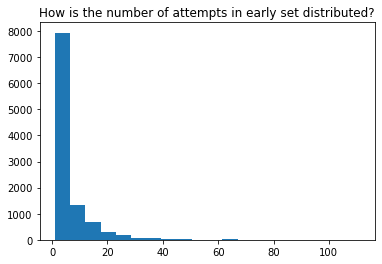

In [12]:
#How is the number of attempts in early set distributed?
plt.hist(early["Attempts"], bins=20)
plt.title("How is the number of attempts in early set distributed?")
#Probably Poisson-Distribution

In [13]:
#How is the Label distributed?
early["Label"].value_counts()
#It is skewed!

True     7942
False    2715
Name: Label, dtype: int64

In [14]:
#Are there very difficult exercises?
early["Label"].groupby([early["AssignmentID"], early["ProblemID"]]).value_counts()
#Not so much by definition of the Label
#Maybe change definition of label for prediction of grade!

AssignmentID  ProblemID  Label
439           1          True     302
                         False     58
              3          True     276
                         False     83
              5          True     282
                         False     80
              12         True     284
                         False     75
              13         True     280
                         False     85
              232        True     284
                         False     78
              233        True     273
                         False     87
              234        True     283
                         False     79
              235        True     275
                         False     87
              236        True     274
                         False     88
487           17         True     277
                         False     74
              20         True     286
                         False     65
              21         True     281
                   

In [15]:
#How often do Correct Eventually and Label differ?
(early["CorrectEventually"] == early["Label"]).value_counts()
#The Label is unequal to Correct Eventually, if the respondend needed more Attenpts than 75% of her peers. 

True     8569
False    2088
dtype: int64

## Subject Level DF

In [16]:
#Function from "naive_model.ipynb", extended by me
#Changed to use subject_id
def extract_instance_features(subject_id, early_df):
    instance = pd.DataFrame(data=[subject_id], columns=["SubjectID"])
    early_problems = early_df[early_df["SubjectID"] == subject_id]
    # Extract very naive features about the student
    # (without respect to the problem bring predicted)
    # Number of early problems attempted
    instance['ProblemsAttempted'] = early_problems.shape[0]
    # Percentage of early problems gotten correct eventually
    instance['PercCorrectEventually'] = np.mean(early_problems['CorrectEventually'])
    # Median attempts made on early problems
    instance['MedAttempts'] = np.median(early_problems['Attempts'])
    # Max attempts made on early problems
    instance['MaxAttempts'] = np.max(early_problems['Attempts'])
    # Percentage of problems gotten correct on the first try
    instance['PercCorrectFirstTry'] = np.mean(early_problems['Attempts'] == 1)
    #instance = instance.drop('SubjectID')
    instance['PercLabelledTrue'] = np.mean(early_problems["Label"] == 1)
    instance['PercAltLabelTrue'] = np.mean(early_problems["alt_Label"] == 1)
    return instance


def make_subject_df(task_level_data):
    """Create a DataFrame that aggregates Task-Performance-Data on subject-level

    Args:
        task_level_data (pd.DataFrame): Task-Performance-Date aggregated from Event-Data. 
    """
    subjects = task_level_data["SubjectID"].unique()
    subject_df = pd.DataFrame(columns=["SubjectID", "ProblemsAttempted", "PercCorrectEventually", "MedAttempts", "MaxAttempts", "PercCorrectFirstTry", "PercLabelledTrue", "PercAltLabelTrue"])
    for subject in subjects:
        instance_data = extract_instance_features(subject, task_level_data)
        subject_df = subject_df.append(instance_data)
    return(subject_df)

In [17]:
subject_df = make_subject_df(early)
subject_df

,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue,PercAltLabelTrue
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333,0.600000
0,01e96e066eff2e82627dac0493737be2de9bd2f50d6d49...,20,0.750000,4.0,15,0.300000,0.650000,0.450000
0,03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b0...,30,0.966667,3.0,45,0.333333,0.766667,0.533333
0,0461c96c9cc0058f709704605f24136f373ba4e9ac083a...,29,0.896552,6.0,22,0.103448,0.517241,0.310345
0,048fce7bd5670d2ce6215f41856aea059973fb280ce106...,30,1.000000,3.5,26,0.333333,0.833333,0.500000
...,...,...,...,...,...,...,...,...
0,fe545219144abfb405c64d3fed4f32dc348ece7afb0a81...,30,1.000000,2.0,26,0.466667,0.900000,0.600000
0,ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b53...,30,1.000000,4.0,38,0.266667,0.633333,0.433333
0,ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4...,30,0.933333,3.5,34,0.233333,0.800000,0.500000
0,ff86d28801139f82f29ac25c715647674d50977478b8d8...,30,1.000000,3.0,31,0.266667,0.866667,0.633333


In [18]:
#What is the percent of Average correct Answers 
np.mean(subject_df["PercCorrectEventually"])

0.9371397887907342

Text(0.5, 1.0, 'Distribution of Percent Correct Eventually in early DF')

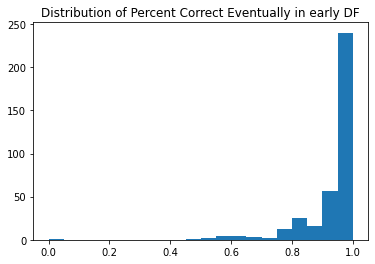

In [19]:
plt.hist(subject_df["PercCorrectEventually"], bins=20)
plt.title("Distribution of Percent Correct Eventually in early DF")

In [20]:
#What is the Average of correct Anwer on first try?
np.mean(subject_df["PercCorrectFirstTry"])

0.31904243814476974

Text(0.5, 1.0, 'Distribution of Percent Correct First Try in early DF')

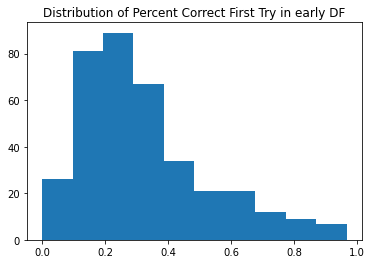

In [21]:
plt.hist(subject_df["PercCorrectFirstTry"])
plt.title("Distribution of Percent Correct First Try in early DF")

In [22]:
#What is teh Average of being labelled as True?
np.mean(subject_df["PercLabelledTrue"])

0.7423874802013036

Text(0.5, 1.0, 'Distribution of Label in early DF')

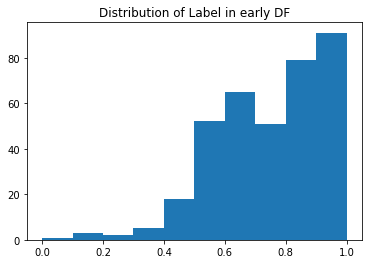

In [23]:
plt.hist(subject_df["PercLabelledTrue"])
#Es scheint hier durchaus viel Varianz zu geben!
plt.title("Distribution of Label in early DF")

In [24]:
np.mean(subject_df["PercAltLabelTrue"])

0.5595540475247396

Text(0.5, 1.0, 'Distribution of Alternative Label in early DF')

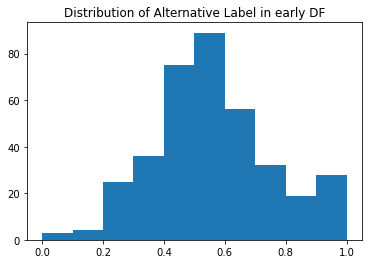

In [25]:
plt.hist(subject_df["PercAltLabelTrue"])
#Es scheint hier durchaus viel Varianz zu geben!
plt.title("Distribution of Alternative Label in early DF")

Text(0.5, 1.0, 'Distribution of Median Attempts in early DF')

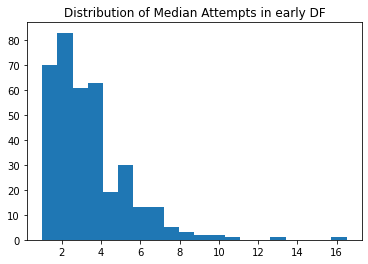

In [26]:
#How is the number of Attempts distributed?
plt.hist(subject_df["MedAttempts"], bins=20)
plt.title("Distribution of Median Attempts in early DF")

# Simulation and Prediction Model

## Simple UIRT Model for early ability with labels as answer-codes

In [27]:
#Obtain Matrix of Response-vectors
U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
U = U.dropna()
U


AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  0.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  1.0  0.0  1.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  1.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [28]:
#Obtain Matrix of Response-vectors
alt_U = pd.crosstab(index = early["SubjectID"], 
            columns=[early["AssignmentID"], early["ProblemID"]], 
            values=early["alt_Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
alt_U = alt_U.dropna()
alt_U

AssignmentID                                        439                      \
ProblemID                                           1    3    5    12   13    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  0.0  0.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  0.0  1.0  1.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           232  233  234  235  236   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  0.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  0.0  1.0  1.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  0.0  0.0  0.0  0.0  0.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  1.0  0.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  0.0  1.0  1.0  0.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  0.0  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                        ...  492                 \
ProblemID                                           ...  31   32   33   34    
SubjectID                                           ...                       
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  ...  1.0  0.0  0.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  ...  0.0  0.0  0.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  ...  0.0  0.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  ...  1.0  1.0  1.0  0.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  ...  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  ...  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  ...  0.0  0.0  0.0  0.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  ...  1.0  0.0  0.0  0.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  ...  1.0  0.0  0.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  ...  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           36   37   38   39   40    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  1.0  0.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  0.0  1.0  0.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  0.0  0.0  1.0  0.0  1.0   
072db31ce670255297c5d67fd00068faf81a7f50223b5a5...  1.0  1.0  1.0  1.0  1.0   
...                                            

In [29]:
#Are there inconsistent entry's in U?
np.where(U > 1.0)

(array([], dtype=int64), array([], dtype=int64))

In [30]:
#Define Item Characteristic Curve Function based on vectors a, b, theta. 
def ICC(parameters, theta):
    """_summary_

    Args:
        a (_type_): _description_
        b (_type_): _description_
        theta (_type_): _description_
    """
    a, b = parameters
    try: 
        item_dim = len(b)
    except Exception:
         item_dim = 1
    theta_expand = np.transpose(np.tile(theta, (item_dim, 1)))
    ability_item_product = np.subtract(theta_expand, b)
    sigma = 1/(1+np.exp(-np.multiply(a,(ability_item_product))))
    return(sigma)

In [31]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=0, scale=1, size = U.shape[1])
theta = np.random.normal(loc=0, scale=1, size = U.shape[0])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

In [32]:
#Plot all ICC's according to their current parameters
def plot_iccs(a, b, range=[-5,5], step=0.2, title=""):
    for i, discrimination in enumerate(a):
        x = np.arange(start=range[0], stop=range[1], step=step)
        y = ICC([a[i], b[i]], x)
        plt.plot(x,y)
        plt.title(title)

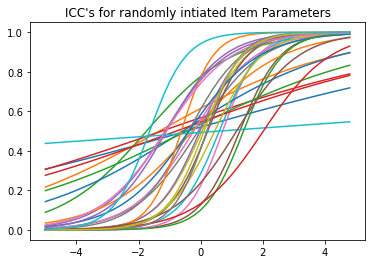

In [33]:
plot_iccs(a=a, b=b, title="ICC's for randomly intiated Item Parameters")


## Simple ML Parameter Estimation with fixed theta

I think that this is actually closely related to classical test theory. 

In [34]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=25, scale=1, size = U.shape[1])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

theta = np.sum(U, axis=1)

In [35]:
#Function for calculating the log-likelihood of the data given the current paramater choices.
def uirt_log_likelihood(U, a, b, theta):
    likelihoods = np.empty(shape=theta.shape)
    ICC_values = ICC([a, b], theta)
    for i, u in enumerate(U.to_numpy()):
        likelihoods[i] = np.dot(u, np.log(ICC_values[i])) + np.dot((1-u), np.log(1-ICC_values[i]))
    return(np.sum(likelihoods)) 

In [36]:
uirt_log_likelihood(U, a, b, theta)
#Problem is underspecified, we need assumptions on theta to proceed

-23148.622543734913

In [37]:
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import minimize

nll = lambda x: -1*uirt_log_likelihood(U=U, a=x[0:len(a)], b=x[len(a):len(x)], theta=theta)

#The Nelder-mead method is simplex based and does not need derivatives. To get better results other methods should be used. 
res = minimize(nll, x0=np.concatenate((a,b), axis=0), method='Nelder-Mead')
res

C:\Users\Jesper\AppData\Local\Temp\ipykernel_9200\2898752155.py:6: RuntimeWarning: divide by zero encountered in log
  likelihoods[i] = np.dot(u, np.log(ICC_values[i])) + np.dot((1-u), np.log(1-ICC_values[i]))


 final_simplex: (array([[ 0.04206543,  0.26611196,  1.62229433, ..., 24.04521385,
        21.13847831, 35.39983356],
       [ 0.04276048,  0.27284693,  1.62000548, ..., 24.03498279,
        21.21713199, 35.23310882],
       [ 0.04439213,  0.26707517,  1.6256875 , ..., 24.06947831,
        21.21055741, 35.09407806],
       ...,
       [ 0.04471775,  0.23838715,  1.63488862, ..., 23.81943364,
        20.72027734, 34.75098516],
       [ 0.04139818,  0.24303279,  1.63394785, ..., 23.9535538 ,
        20.91863345, 35.04211564],
       [ 0.05379757,  0.27993084,  1.62611561, ..., 23.98290835,
        21.30080951, 34.85250637]]), array([8395.06061829, 8397.97716691, 8398.08117109, 8398.34825334,
       8398.60764316, 8398.81916466, 8398.9002881 , 8399.22180049,
       8400.28079243, 8400.98733534, 8401.20238321, 8401.31490927,
       8401.5948648 , 8402.02322022, 8402.02797196, 8402.37825609,
       8402.39788134, 8402.43302588, 8402.44253991, 8402.49541866,
       8402.53439201, 8402.6470219

In [38]:
a_hat = res.x[0:len(a)]
b_hat = res.x[len(a): len(res.x)]

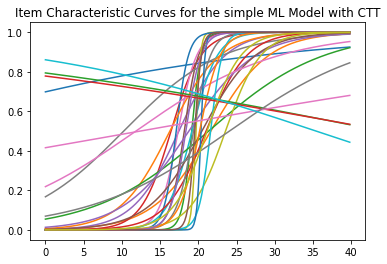

In [39]:
#The Discrimitation of some Items is negative and flat. 
#The Difficultys of the othere Items are rather close together
#Discrimination is highest in the lower ability area.
plot_iccs(a_hat, b_hat, range=[0, 40], title="Item Characteristic Curves for the simple ML Model with CTT")

In [40]:
sum(a_hat < 0)
#One third of the discrimination estimates is negative. 

3

## MMLE Method to estimate person and item parameters simultaniously with EM Algorithm

In [41]:
#Define some random starting values for the 2PL Model
b = np.random.normal(loc=0, scale=1, size = U.shape[1])
a = np.random.uniform(low=0, high=2, size = U.shape[1])

In [42]:
def complete_data_log_likelihood(ability_weight, correct_response_weight, current_parameters, quadratures, quadrature_probs, ICC):
    K = len(ability_weight) #Number of Quadratures or factors of the latent prior
    J = len(current_parameters[0]) #Number of Items
    ICC_values = ICC(current_parameters, quadratures)
    log_likelihood = 0
    for j in range(0,J):
        r_j = correct_response_weight[j, :] #vector: should be equal in length to # of Items
        log_likelihood += np.dot(r_j, np.log(ICC_values[:,j])) + np.dot(np.subtract(ability_weight, r_j), np.log((1-ICC_values[:,j]))) + np.dot(ability_weight*np.ones((1, K)), np.log(quadrature_probs))
    return(log_likelihood)

In [43]:
def conditional_ability_probability(response_pattern, current_parameters, prior_dist, ICC):
    quadratures, quadrature_dist = prior_dist
    K = len(quadratures)
    conditional_answer_probability = np.empty(shape=K)
    for k in range(0, K):
        conditional_answer_probability[k] = np.prod(np.power(ICC(current_parameters, quadratures[k]), response_pattern))*np.prod(np.power(1-ICC(current_parameters, quadratures[k]), 1-response_pattern))
    p_sum = np.sum(conditional_answer_probability)
    conditional_ability_p = [conditional_answer_probability[k]/p_sum for k in range(0, K)]
    return(conditional_ability_p)
        


def e_step_mmle(response_data, current_parameters, prior_dist, ICC):
    """E-Step for a classic UIRT-Model with a latent prior distribution like in Hanson 2000

    Args:
        response_data (pd.DataFrame): Dichotomous Data for Item Responses, rows=respondents, cols=Items
        current_parameters (list): Current Parameters from last M-Sterp or initiation
        prior_dist (list): List of the format [quadratures, quadrature_weights]
        ICC (function): ICC for the respective UIRT Model. 
    """
    quadratures = prior_dist[0]
    #ICC_values = ICC(current_parameters, quadratures)
    #Calculate Expected Values
    N = response_data.shape[0]
    K = len(quadratures)
    c_a_p = np.empty(shape=(N,K))
    for i, response_pattern in enumerate(response_data.to_numpy()):
        c_a_p[i] = conditional_ability_probability(response_pattern, current_parameters, prior_dist, ICC)
    ability_weights = np.sum(np.array(c_a_p), axis=0) #There should be K ability weights
    correct_response_weights =  np.dot(np.transpose(response_data), np.array(c_a_p))#should be a K * J Matrix
    
    return(ability_weights, correct_response_weights)

In [44]:
from scipy.optimize import minimize

def m_step_mmle(expectation, current_parameters, prior_dist, ICC):
    """M-Step for a classic UIRT-Model with a latent prior distribution like in Hanson 2000

    Args:
        expectation (list): Expectation for key model constants from the E-Step
        current_parameters (list): Current Parameters from last M-Sterp or initiation
        prior_dist (list): List of the format [quadratures, quadrature_weights]
        ICC (function): ICC for the respective UIRT Model. 
    """
    ability_weight, correct_response_weight = expectation
    N, J = U.shape
    #Define negative log-likelihood in relation to x = (a, b)
    nll = lambda x: -1*complete_data_log_likelihood(ability_weight, correct_response_weight,
                                                     current_parameters=[x[0 : len(current_parameters[0])], x[len(current_parameters[0]) : len(current_parameters[0])+len(current_parameters[1])]],#a=x[0:len(a)], b=x[len(a):len(x)], 
                                                     quadratures=prior_dist[0], quadrature_probs = prior_dist[1], 
                                                     ICC=ICC)
    #a_t, b_t = current_parameters
    nll(np.concatenate(current_parameters, axis=0))
    x0 = np.concatenate(current_parameters, axis=0)
    res = minimize(nll, x0=x0, method='Nelder-Mead') #BFGS
    new_parameters = [res.x[0 : len(current_parameters[0])], res.x[len(current_parameters[0]) : len(current_parameters[0])+len(current_parameters[1])]]
    #a_hat = res.x[0:len(a_t)]
    #b_hat = res.x[len(a_t): len(res.x)]
    likelihood = res.fun
    return(new_parameters, likelihood)

In [45]:
from scipy.stats import norm

def generate_prior_norm(loc, scale, K, dist=norm):
    prior_dist = dist(loc, scale)
    start_point = loc-2.5*scale
    end_point = loc+2.5*scale
    side_points = np.linspace(start_point, end_point, num=K+1)
    quadratures = [(side_points[i]+side_points[i-1])/2 for i in range(1,len(side_points))]
    quadrature_dist = [prior_dist.cdf(side_points[i])-prior_dist.cdf(side_points[i-1]) for i in range(1, len(side_points))]
    quadrature_dist[0] = prior_dist.cdf(side_points[1])
    quadrature_dist[K-1] = 1-prior_dist.cdf(side_points[K-1])
    return(quadratures, quadrature_dist)

In [46]:
def em_algorithm(response_data, starting_parameters, prior_dist, 
                e_step=lambda current_parameters, prior_dist, ICC: e_step_mmle(U, current_parameters, prior_dist, ICC), 
                m_step=m_step_mmle, stop_criterion=[0.01, 0.01], ICC=ICC):
    """Basic formulation of the EM-Algorithm for estimimating Parameters for IRT

    Args:
        response_data (pd.DataFrame or np.array): Response data from Item's 
        starting_parameters (np.array): Initial Parameters to be handed over to the EM-steps. End-result might depend on these.
        e_step (function): Algorithm for calculating the current expected 
        m_step (function): Algorithm for finding the best paramaters given the current expectation. 
    """
    converged = False
    current_parameters = starting_parameters
    i = 0
    while (not converged) and i <= 100:
        last_step_parameters = current_parameters
        expectation = e_step(current_parameters, prior_dist, ICC)
        current_parameters, log_likelihood = m_step(expectation, current_parameters, prior_dist, ICC)
        parameter_diff = [np.sum(np.abs(current_parameters[i]-last_step_parameters[i])) for i in range(0, len(current_parameters))]
        if (np.sum(np.array(parameter_diff)>=np.array(stop_criterion)) == 0) and i >= 10:
            converged = True
        i = i+1
        print("Step: {0}: current parameter_diff: {1}, current data likelihood: {2}".format(i, parameter_diff, log_likelihood))
    return(current_parameters)


In [47]:
res = em_algorithm(response_data=U, 
                    starting_parameters=[a,b], 
                    prior_dist=generate_prior_norm(0, 1, 10),
                    stop_criterion=[0.02, 50])

Step: 1: current parameter_diff: [15.463902183140467, 34.37942395511986], current data likelihood: 29802.45234075981
Step: 2: current parameter_diff: [7.468572608774521, 30.674831670845123], current data likelihood: 29045.261714482844
Step: 3: current parameter_diff: [3.855700090768719, 44.20099460999255], current data likelihood: 28588.059427548505
Step: 4: current parameter_diff: [2.3854593363659395, 75.16610341753574], current data likelihood: 28161.983345640554
Step: 5: current parameter_diff: [2.0054406145485486, 54.05496305880224], current data likelihood: 27867.223246337813
Step: 6: current parameter_diff: [1.8170503207177788, 310.80638605873264], current data likelihood: 27676.892022744323
Step: 7: current parameter_diff: [1.7452081948619689, 753.4164088362761], current data likelihood: 27492.271847209937
Step: 8: current parameter_diff: [1.2170272786395744, 681.6191672288271], current data likelihood: 27429.15467142003
Step: 9: current parameter_diff: [0.9185748597654686, 71.5

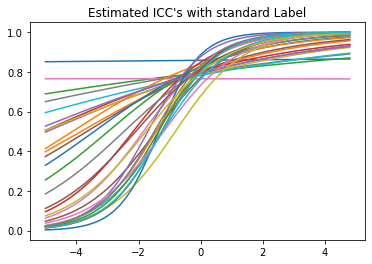

In [48]:
#ICC's for EM-Result with standard Label
a_hat, b_hat = res

plot_iccs(a_hat, b_hat, range=[-5, 5], title="Estimated ICC's with standard Label")

In [49]:
alt_res = em_algorithm(response_data=alt_U, starting_parameters=[a,b], prior_dist=generate_prior_norm(0, 1, 10))

Step: 1: current parameter_diff: [15.463902183140467, 34.37942395511986], current data likelihood: 29802.45234075981
Step: 2: current parameter_diff: [7.468572608774521, 30.674831670845123], current data likelihood: 29045.261714482844
Step: 3: current parameter_diff: [3.855700090768719, 44.20099460999255], current data likelihood: 28588.059427548505
Step: 4: current parameter_diff: [2.3854593363659395, 75.16610341753574], current data likelihood: 28161.983345640554
Step: 5: current parameter_diff: [2.0054406145485486, 54.05496305880224], current data likelihood: 27867.223246337813
Step: 6: current parameter_diff: [1.8170503207177788, 310.80638605873264], current data likelihood: 27676.892022744323
Step: 7: current parameter_diff: [1.7452081948619689, 753.4164088362761], current data likelihood: 27492.271847209937
Step: 8: current parameter_diff: [1.2170272786395744, 681.6191672288271], current data likelihood: 27429.15467142003
Step: 9: current parameter_diff: [0.9185748597654686, 71.5

In [ ]:
plot_iccs(alt_res[0], alt_res[1], range=[-5, 5], title="Estimated ICC's with alternative Label")

TypeError: plot_iccs() got an unexpected keyword argument 'title'

### Fit the Person Parameters

In [ ]:
def answer_log_likelihood(theta, answer_vector, item_parameters, prior_dist):
    ICC_values = ICC(item_parameters, theta)
    log_likelihood = np.dot(answer_vector, np.log(ICC_values)[0]) + np.dot((1-answer_vector), np.log(1-ICC_values)[0]) + np.log(prior_dist.pdf(theta))
    return(log_likelihood)

In [ ]:
answer_log_likelihood(0.5, U.iloc[1], [a_hat, b_hat], norm(loc=0, scale=1))

-17.05712472858335

In [ ]:
def fit_ability(response_data, item_parameters, prior_dist = norm(0,1)):
    """Given the estimated item-parameters for a UIRT-Model and some response_data, this function will estimate the latent ability for every respondent.

    Args:
        response_data (pd.DataFrame or np.array): Response data from Item's 
        item_parameters (list): list of estimated item_parameters
        prior_dist (scipy.stats.distribution, optional): Prior Distribution for latent trait in given sample. If nothing else is apparent this should be equal to the prior
                                                         dist that was used in the estimation process . Defaults to norm(0,1).
    """
    ability_vector = np.empty(response_data.shape[0])
    for i,response_pattern in enumerate(response_data.to_numpy()):
        nll = lambda x: -1*answer_log_likelihood(x, response_pattern, item_parameters, prior_dist)
        res = minimize(nll, x0=np.random.normal(0,1), method='BFGS')
        ability_vector[i] = res.x
    return(pd.Series(ability_vector))

In [ ]:
ability = fit_ability(U, [a_hat, b_hat])

Text(0.5, 1.0, 'Distribution of early-Ability within the Course-sample')

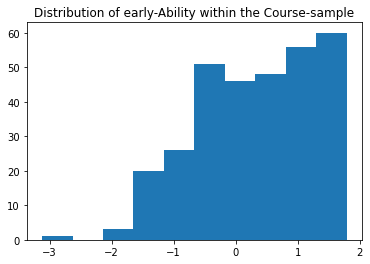

In [ ]:
plt.hist(ability)
plt.title("Distribution of early-Ability within the Course-sample")

(array([ 3., 14., 56., 40., 57., 48., 31., 26., 14., 22.]),
 array([-3.46016691, -2.95384772, -2.44752852, -1.94120932, -1.43489013,
        -0.92857093, -0.42225174,  0.08406746,  0.59038666,  1.09670585,
         1.60302505]),
 <BarContainer object of 10 artists>)

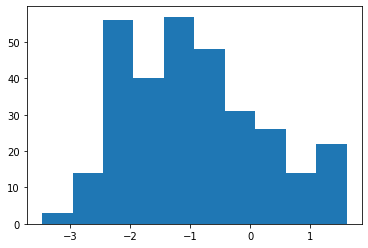

In [ ]:
alt_ability = pd.Series(fit_ability(alt_U, alt_res))
plt.hist(alt_ability)
plt.title("Distribution of Alternative early-ability within the course-sample")

In [ ]:
#Extend Subject-DF with ability
subject_df = subject_df[subject_df["ProblemsAttempted"] == 30 ]

subject_df["ability"] = ability.to_numpy()
subject_df["alt_ability"] = alt_ability.to_numpy()
subject_df

C:\Users\Jesper\AppData\Local\Temp\ipykernel_6124\1906867978.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df["ability"] = ability.to_numpy()
C:\Users\Jesper\AppData\Local\Temp\ipykernel_6124\1906867978.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subject_df["alt_ability"] = alt_ability.to_numpy()


,SubjectID,ProblemsAttempted,PercCorrectEventually,MedAttempts,MaxAttempts,PercCorrectFirstTry,PercLabelledTrue,PercAltLabelTrue,ability,alt_ability
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,30,0.966667,3.0,22,0.333333,0.833333,0.600000,0.308042,-1.044752
0,03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b0...,30,0.966667,3.0,45,0.333333,0.766667,0.533333,-0.009095,-1.315150
0,048fce7bd5670d2ce6215f41856aea059973fb280ce106...,30,1.000000,3.5,26,0.333333,0.833333,0.500000,0.967313,-1.219260
0,04ed28ab2b2a010c686bf190a5f001dfdc7d9ec4185904...,30,1.000000,2.0,7,0.466667,0.966667,0.666667,1.673500,-0.575862
0,072db31ce670255297c5d67fd00068faf81a7f50223b5a...,30,1.000000,1.0,2,0.966667,1.000000,1.000000,1.785239,1.603024
...,...,...,...,...,...,...,...,...,...,...
0,fe545219144abfb405c64d3fed4f32dc348ece7afb0a81...,30,1.000000,2.0,26,0.466667,0.900000,0.600000,0.993712,-0.021989
0,ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b53...,30,1.000000,4.0,38,0.266667,0.633333,0.433333,-0.368386,-2.134955
0,ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4...,30,0.933333,3.5,34,0.233333,0.800000,0.500000,0.929325,-1.121087
0,ff86d28801139f82f29ac25c715647674d50977478b8d8...,30,1.000000,3.0,31,0.266667,0.866667,0.633333,0.855927,-0.895433


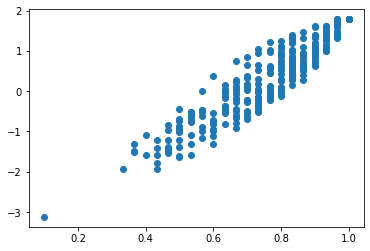

In [ ]:
plt.scatter(subject_df["PercLabelledTrue"], subject_df["ability"])
plt.title("Relation between ability and actual Percent Correct on early tasks")

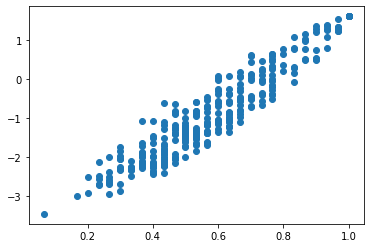

In [ ]:
plt.scatter(subject_df["PercAltLabelTrue"], subject_df["alt_ability"])
plt.title("Relation between alternative ability and actual Percent Correct on early tasks")

Text(0, 0.5, 'Alternative ability')

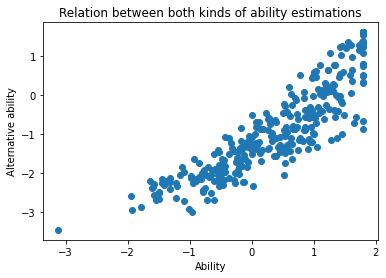

In [ ]:
plt.scatter(subject_df["ability"], subject_df["alt_ability"])
plt.title("Relation between both kinds of ability estimations")
plt.xlabel("Ability")
plt.ylabel("Alternative ability")

## Late Performance Model

In [ ]:
late = pd.read_csv(os.path.join(TRAIN_PATH, 'late.csv'))
late

,SubjectID,AssignmentID,ProblemID,Label
0,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,41,True
1,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,43,True
2,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,44,True
3,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,46,True
4,014604ba54339d4b1266cf78e125053a5ac11dd861ef3c...,494,49,True
...,...,...,...,...
7016,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,64,True
7017,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,70,False
7018,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,71,True
7019,ffc3b91c3744d275e99f49e105f016732d694a76314d8c...,502,112,True


In [ ]:
#Obtain Matrix of Response-vectors
late_U = pd.crosstab(index = late["SubjectID"], 
            columns=[late["AssignmentID"], late["ProblemID"]], 
            values=late["Label"],
            aggfunc="sum")
#At the moment we will delete missing values row-wise. It will be usefull to impute values later, since missing at random is unlikely
late_U = late_U.dropna()
late_U

AssignmentID                                        494                      \
ProblemID                                           41   43   44   46   49    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  1.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  1.0  0.0  0.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  1.0  1.0  1.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  0.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  1.0  1.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  1.0  1.0  1.0   

AssignmentID                                                                 \
ProblemID                                           67   104  106  107  108   
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  0.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  1.0  1.0  0.0  1.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  1.0  0.0  0.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  1.0  0.0  0.0  0.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  0.0  0.0  1.0  0.0   

AssignmentID                                        502                      \
ProblemID                                           45   48   51   56   57    
SubjectID                                                                     
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  1.0  1.0  0.0  1.0  1.0   
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  0.0  0.0  0.0  1.0  0.0   
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  0.0  1.0  1.0   
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0   
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0   
...                                                 ...  ...  ...  ...  ...   
fe545219144abfb405c64d3fed4f32dc348ece7afb0a814...  1.0  1.0  1.0  1.0  1.0   
ff02364c8aab08a51916bd6a58bf7337b5d60939ee9b538...  0.0  0.0  1.0  1.0  1.0   
ff4cfd98fc176f36fa99b2bc839990d2fd13de4e59b5c4a...  1.0  1.0  1.0  1.0  1.0   
ff86d28801139f82f29ac25c715647674d50977478b8d84...  1.0  1.0  1.0  1.0  1.0   
ffc3b91c3744d275e99f49e105f016732d694a76314d8cd...  1.0  1.0  0.0  1.0  1.0   

AssignmentID                                                                 
ProblemID                                           64   70   71   112  118  
SubjectID                                                                    
014604ba54339d4b1266cf78e125053a5ac11dd861ef3cc...  0.0  0.0  1.0  1.0  1.0  
03000c72d4dd6a4be44ffc175dec5d9a15a83a2f8073b08...  1.0  0.0  1.0  1.0  1.0  
0461c96c9cc0058f709704605f24136f373ba4e9ac083a1...  0.0  0.0  0.0  0.0  1.0  
048fce7bd5670d2ce6215f41856aea059973fb280ce1067...  1.0  1.0  1.0  1.0  1.0  
04ed28ab2b2a010c686bf190a5f001dfdc7d9ec41859048...  1.0  1.0  1.0  1.0  1.0  
...                                                 ...

In [ ]:
def LFA_Curve(parameters, alpha, s):
    """ICC that corresponds to the Concept of LFA (Learning Factor Analysis) and Features prior ability as well as item and person paramers.

    Args:
        parameters (list): list of the format [beta, gamma]. beta is the vector of Item-Easiness. gamma is the vector of item-training effectiveness. 
        alpha (np.ndarray): prior ability values. 
        s (np.ndarray): Person training-extend. 
    """
    beta, gamma = parameters
    try: 
        item_dim = len(beta)
    except Exception:
        item_dim = 1
    s_expand = np.transpose(np.tile(s, (item_dim, 1)))
    sigmoid_arg = np.add(np.expand_dims(alpha, axis=1), np.add(beta, np.multiply(gamma, s_expand)))
    sigma = 1/(1+np.exp(-1*sigmoid_arg))
    return(sigma)

In [ ]:
def e_step_late_mmle(data, current_parameters, prior_dist, ICC):
    """E-Step for a LFA-Model with a latent prior distribution

    Args:
        response_data (pd.DataFrame): Dichotomous Data for Item Responses, rows=respondents, cols=Items
        current_parameters (list): Current Parameters from last M-Sterp or initiation
        prior_dist (list): List of the format [quadratures, quadrature_weights]
        ICC (function): ICC for the respective LFA Model. 
    """
    response_data, alpha_data = data
    quadratures, quadrature_probs = prior_dist
    #Calculate Expected Values
    N = response_data.shape[0]
    K = len(quadratures)
    c_a_p = np.empty(shape=(N,K))
    for i, response_pattern in enumerate(response_data.to_numpy()):
        c_a_p[i] = conditional_ability_probability(response_pattern, current_parameters, prior_dist, lambda parameters, s: ICC(parameters, [alpha_data[i]], s))
    ability_weights = np.sum(np.array(c_a_p), axis=0) #There should be K ability weights
    expected_alpha = [(1/N*quadrature_probs[k])*np.sum(alpha_data*c_a_p[:,k]) for k in range(0, K)]
    correct_response_weights =  np.dot(np.transpose(response_data), np.array(c_a_p))#should be a K * J Matrix
    
    return(ability_weights, correct_response_weights, expected_alpha)

In [ ]:
def m_step_late_mmle(expectation, current_parameters, prior_dist, ICC):
    """M-Step for a LFA-Model with a latent prior distribution like in Hanson 2000

    Args:
        expectation (list): Expectation for key model constants from the E-Step
        current_parameters (list): Current Parameters from last M-Step or initiation
        prior_dist (list): List of the format [quadratures, quadrature_weights]
        ICC (function): ICC for the respective LFA Model. 
    """
    ability_weight, correct_response_weight, expected_alpha = expectation
    N, J = U.shape
    #Define negative log-likelihood in relation to x = (a, b)
    nll = lambda x: -1*complete_data_log_likelihood(ability_weight, correct_response_weight,
                                                     current_parameters=[x[0 : len(current_parameters[0])], x[len(current_parameters[0]) : len(current_parameters[0])+len(current_parameters[1])]],#a=x[0:len(a)], b=x[len(a):len(x)], 
                                                     quadratures=prior_dist[0], quadrature_probs = prior_dist[1], 
                                                     ICC=lambda parameters, s: ICC(parameters, expected_alpha, s))
    nll(np.concatenate(current_parameters, axis=0))
    x0 = np.concatenate(current_parameters, axis=0)
    res = minimize(nll, x0=x0, method='Nelder-Mead') #BFGS
    new_parameters = [res.x[0 : len(current_parameters[0])], res.x[len(current_parameters[0]) : len(current_parameters[0])+len(current_parameters[1])]]
    likelihood = res.fun
    return(new_parameters, likelihood)

In [ ]:
from scipy.stats import poisson

def generate_prior_poisson(mu, K):
    prior_dist = poisson(mu)
    start_point = 0
    end_point = 2*mu
    side_points = np.linspace(start_point, end_point, num=K+1)#np.arange(start_point, end_point, step=quadrature_width)
    quadratures = [(side_points[i]+side_points[i-1])/2 for i in range(1,len(side_points))]
    quadrature_dist = [prior_dist.cdf(side_points[i])-prior_dist.cdf(side_points[i-1]) for i in range(1, len(side_points))]
    quadrature_dist[0] = prior_dist.cdf(side_points[1])
    quadrature_dist[K-1] = 1-prior_dist.cdf(side_points[K-1])
    return(quadratures, quadrature_dist)

In [ ]:
alpha = pd.DataFrame(late_U.index).set_index(late_U.index).join(pd.DataFrame(subject_df["ability"]).set_index(subject_df["SubjectID"]))["ability"].to_numpy()
alpha = np.nan_to_num(alpha, nan=np.nanmean(alpha))
s = np.random.poisson(lam=50, size=313)

beta = -1*np.random.exponential(scale=1, size = 20)
gamma = np.random.exponential(scale=0.1, size = 20)

In [ ]:
late_res = em_algorithm(response_data=late_U, 
                        starting_parameters=[beta, gamma], 
                        prior_dist=generate_prior_poisson(50, 15), 
                        ICC=LFA_Curve,#lambda current_parameters, x: LFA_Curve(parameters=current_parameters, s=x),
                        e_step=lambda current_parameters, prior_dist, ICC: e_step_late_mmle([late_U, alpha], current_parameters, prior_dist, ICC), 
                        m_step=m_step_late_mmle)

C:\Users\Jesper\AppData\Local\Temp\ipykernel_6124\1312522418.py:9: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.dot(r_j, np.log(ICC_values[:,j])) + np.dot(np.subtract(ability_weight, r_j), np.log((1-ICC_values[:,j]))) + np.dot(ability_weight*np.ones((1, K)), np.log(quadrature_probs))


Step: 1: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 2: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 3: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 4: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 5: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 6: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 7: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 8: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 9: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 10: current parameter_diff: [0.0, 0.0], current data likelihood: nan
Step: 11: current parameter_diff: [0.0, 0.0], current data likelihood: nan


In [ ]:
late_beta = late_res[0]
late_gamma = late_res[1]

In [ ]:
#Plot all ICC's according to their current parameters
def plot_lfa_iccs(parameters, alpha, area=[-10,100], step=0.2, title=""):
    beta, gamma = parameters
    for i in range(0, len(beta)):
        x = np.arange(start=area[0], stop=area[1], step=step)
        y = LFA_Curve([beta[i], gamma[i]], [alpha], x)
        plt.plot(x,y)
        plt.title(title)

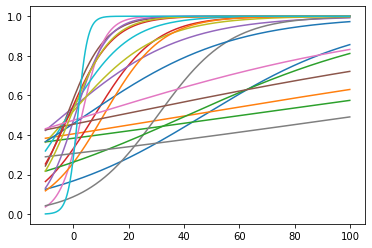

In [ ]:
plot_lfa_iccs([late_beta, late_gamma], alpha=np.mean(alpha), title="LFA-curves for late-response data with fixed alpha and varying training ammount")

## Sample from Data Distribution

In [ ]:
sample_alpha = np.random.normal(loc = 0, scale = 1, size=1000)
s = np.random.poisson(lam=50, size=1000)

In [ ]:
from scipy.stats import bernoulli

def sample_data(alpha, s, early_parameters, late_parameters):
    """Sample Naively from the Response-Data Distributions of early and late Problems.

    Args:
        alpha (np.ndarray): Prior ability, should follow prior distribution most times. 
        s (np.ndarray): Person tarining extend
        early_parameters (list): Early Item parameters from fitting process
        late_parameters (list): Late Item parameters from fitting process
    """
    p_early = ICC(early_parameters, alpha)
    p_late = LFA_Curve(late_parameters, alpha, s)
    early_sample = bernoulli(p=p_early).rvs()
    late_sample = bernoulli(p=p_late).rvs()
    return(pd.DataFrame(early_sample), pd.DataFrame(late_sample))
    

In [ ]:
sample = sample_data(sample_alpha, s, early_parameters=[a_hat, b_hat], late_parameters=[late_beta, late_gamma])

In [ ]:
#Early Sample
sample[0].describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.856000,0.776000,0.788000,0.776000,0.75700,0.750000,0.750000,0.790000,0.746000,0.760000,...,0.678000,0.689000,0.654000,0.642000,0.75700,0.714000,0.616000,0.511000,0.681000,0.649000
std,0.351265,0.417131,0.408929,0.417131,0.42911,0.433229,0.433229,0.407512,0.435515,0.427297,...,0.467477,0.463134,0.475931,0.479652,0.42911,0.452115,0.486601,0.500129,0.466322,0.477522
min,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.00000,0.750000,0.750000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Early Original
U.describe()

AssignmentID         439                                                  \
ProblemID            1           3           5           12          13    
count         311.000000  311.000000  311.000000  311.000000  311.000000   
mean            0.858521    0.784566    0.794212    0.794212    0.781350   
std             0.349077    0.411786    0.404928    0.404928    0.413996   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             1.000000    1.000000    1.000000    1.000000    1.000000   
50%             1.000000    1.000000    1.000000    1.000000    1.000000   
75%             1.000000    1.000000    1.000000    1.000000    1.000000   
max             1.000000    1.000000    1.000000    1.000000    1.000000   

AssignmentID                                                              ...  \
ProblemID            232         233         234         235         236  ...   
count         311.000000  311.000000  311.000000  311.000000  311.000000  ...   
mean            0.787781    0.765273    0.794212    0.774920    0.778135  ...   
std             0.409538    0.424511    0.404928    0.418308    0.416170  ...   
min             0.000000    0.000000    0.000000    0.000000    0.000000  ...   
25%             1.000000    1.000000    1.000000    1.000000    1.000000  ...   
50%             1.000000    1.000000    1.000000    1.000000    1.000000  ...   
75%             1.000000    1.000000    1.000000    1.000000    1.000000  ...   
max             1.000000    1.000000    1.000000    1.000000    1.000000  ...   

AssignmentID         492                                                  \
ProblemID            31          32          33          34          36    
count         311.000000  311.000000  311.000000  311.000000  311.000000   
mean            0.745981    0.729904    0.723473    0.710611    0.781350   
std             0.436010    0.444725    0.448001    0.454210    0.413996   
min             0.000000    0.000000    0.000000    0.000000    0.000000   
25%             0.000000    0.000000    0.000000    0.000000    1.000000   
50%             1.000000    1.000000    1.000000    1.000000    1.000000   
75%             1.000000    1.000000    1.000000    1.000000    1.000000   
max             1.000000    1.000000    1.000000    1.000000    1.000000   

AssignmentID                                                              
ProblemID            37          38          39          40          128  
count         311.000000  311.000000  311.000000  311.000000  311.000000  
mean            0.768489    0.675241    0.742765    0.742765    0.707395  
std             0.422478    0.469039    0.437814    0.437814    0.455692  
min             0.000000    0.000000    0.000000    0.000000    0.000000  
25%             1.000000    0.000000    0.000000    0.000000    0.000000  
50%             1.000000    1.000000    1.000000    1.000000    1.000000  
75%             1.000000    1.000000    1.000000    1.000000    1.000000  
max             1.000000    1.000000    1.000000    1.000000    1.000000  

[8 rows x 30 columns]